<a href="https://colab.research.google.com/github/lebe1/ClimateChangeAI/blob/main/Data-Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Dataset analysis first overview

By downloading the dataset, the reader stumbles across an important on the download page [zenodo.org](https://zenodo.org/records/5153305): 
```quote
It is recommended to read the supplementary info file before using the dataset. For example, it clarifies the time conventions and that NAs are indicated by the number -999 in the runoff time series.
```
This is something to keep in mind for.

Further, reading from the file '/info_english/2_Timeseries.txt' in the LAMAH-dataset, it says:
```quote
[...] Unit of runoff data is m3/s. Conversion to runoff heights can be performed using the catchment area provided (attribute “area_gov” in Appendix A of the accompanying paper). 
The units of the meteorological time series can be obtained from Appendix A of the accompanying paper[...].
The meteorological time series have no gaps.
``` 

This gives us several important insights. First, there is quite an important paper referring to the dataset, which is named [Klingler, C., K. Schulz, and M. Herrnegger. ‘LamaH-CE: LArge-SaMple DAta for Hydrology and Environmental Sciences for Central Europe’. Earth System Science Data 13, no. 9 (2021): 4529–65.](https://doi.org/10.5194/essd-13-4529-2021) and further just as referred as 'the paper'.

We have a given unit of runoff data of m3/s and could convert it to runoff heights with the given catchment area provided. Due to our task of predicting the precipitation with the given data, the runoff data itself is good enough for us.

Exploring this paper further, there is a map given, which represents the datasets catchment overview with river regions and gauge elevations.

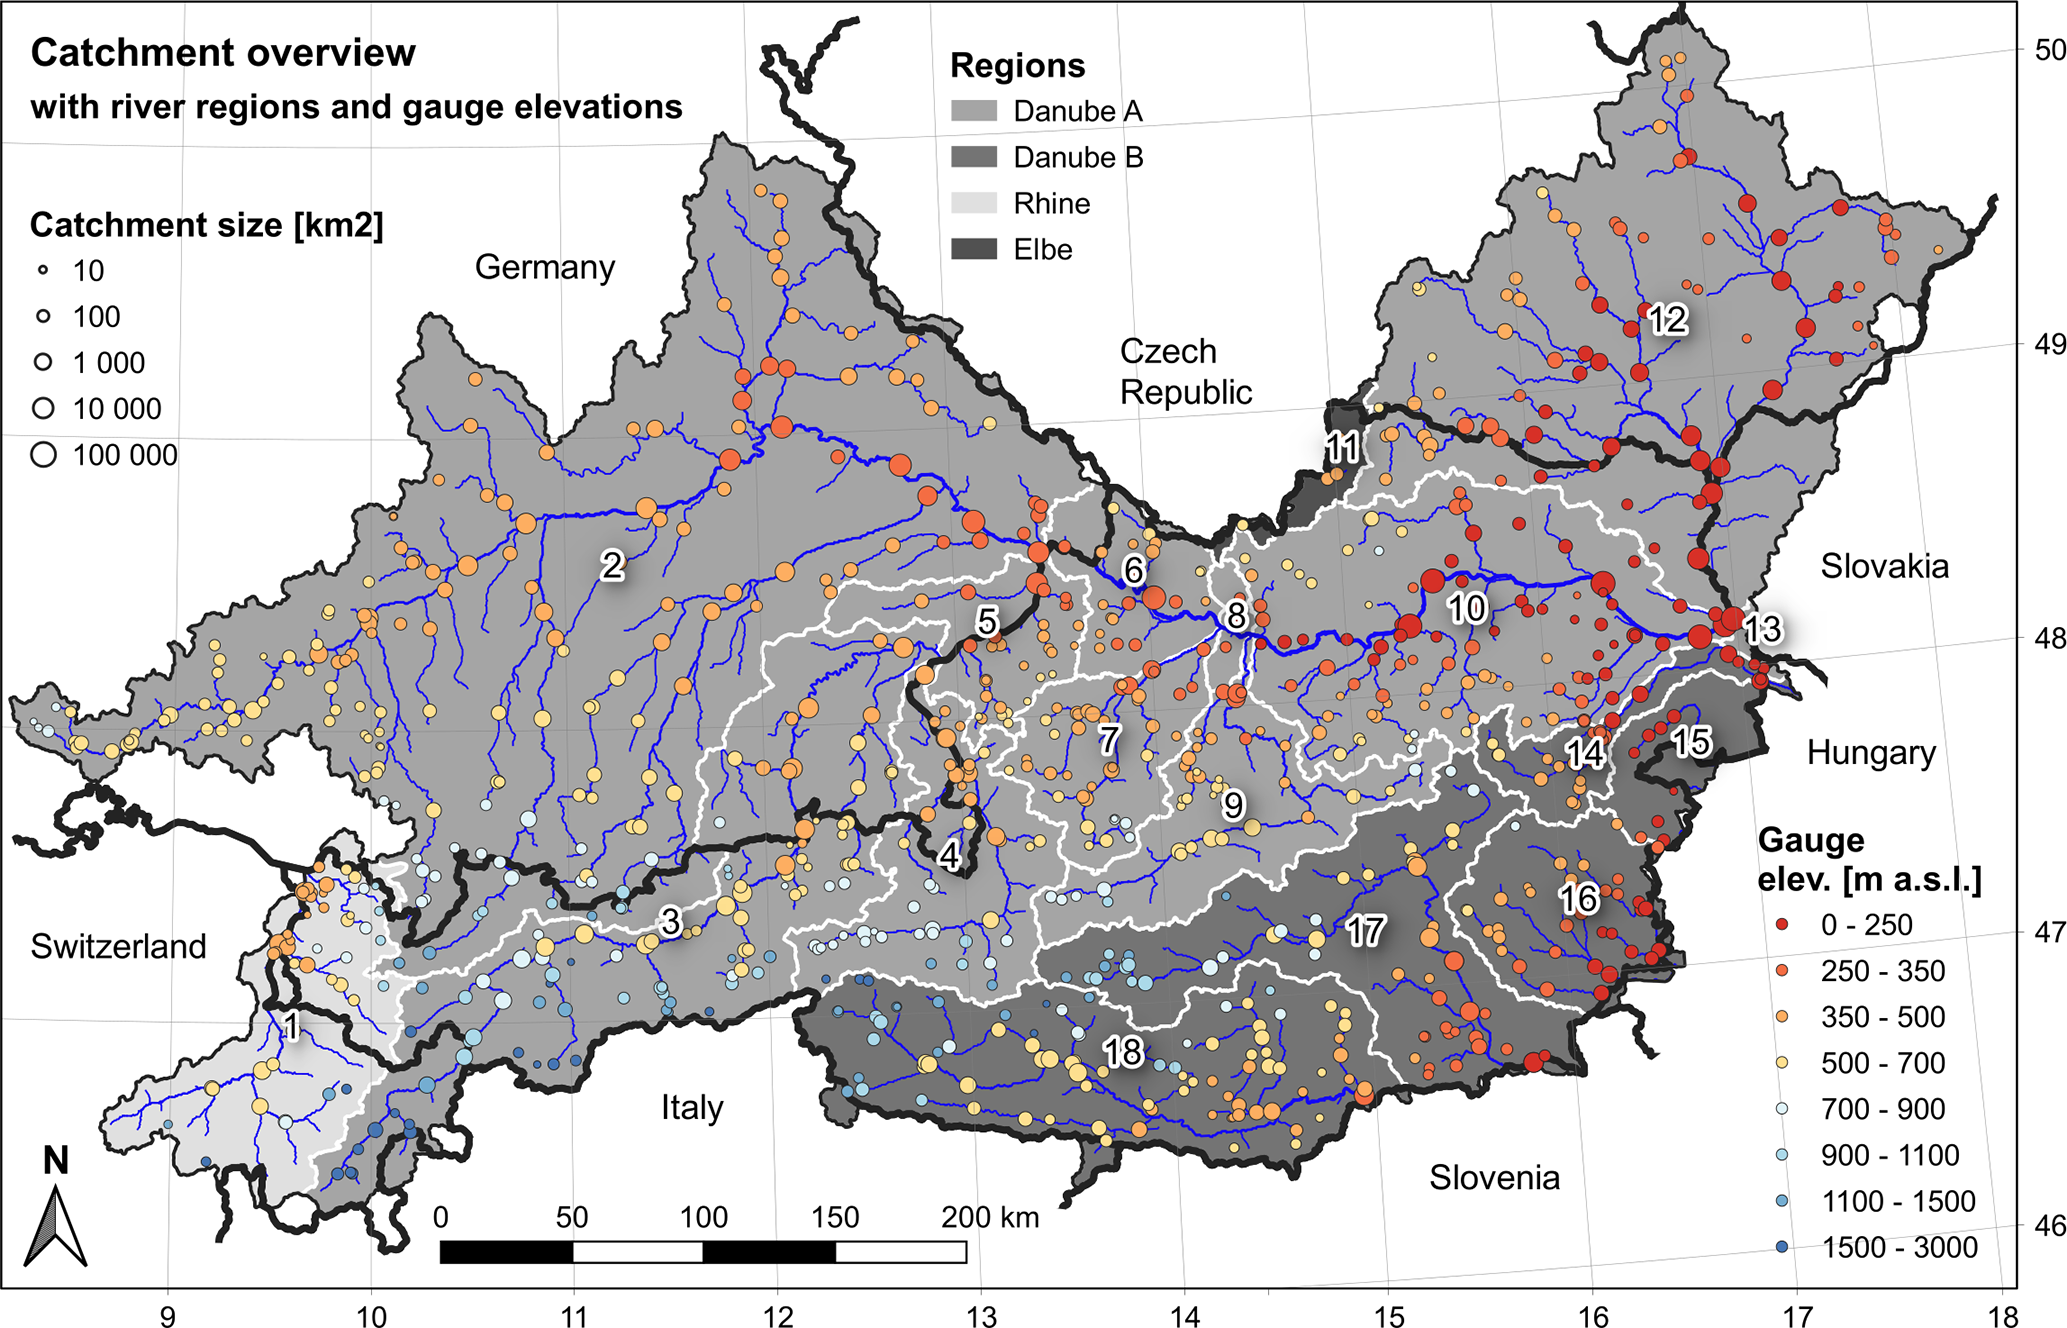

The description of this image is further: "Overview of the area covered in LamaH (grey tones), and the runoff gauges with gauge elevation (circle color) and catchment
area (circle size). LamaH is divided into different river regions, which are bordered by the white lines. The black numbers are abbreviations
of the individual regions, which are indicated in Table B1. The national borders are shown as thick black lines. Source of stream network:
HydroATLAS (Linke et al., 2019). © EuroGeographics for the administrative boundaries."

Therefore Table B1 is quite interesting to look at, which is shown in the appendix.

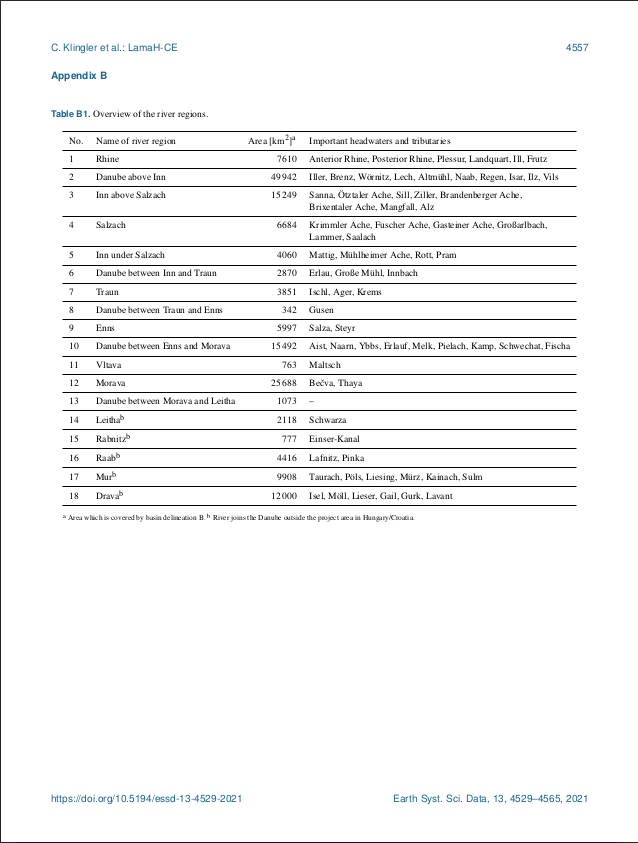

The more detailed overview of each single measurement spot can be found in a directory of the dataset itself 'D_gauges/1_attributes/Gauge_attributes.csv'. There is a region listed belonging to Table B1, a river listed as well as a longitude, a latitude and an elevation.

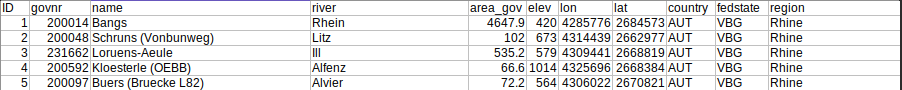


In the actual directory 'A_basins_total_upstrm/2_timeseries/daily/*.csv', there are 860 csv files.\
File numbers are starting from 1 to 882 with the name of "ID_{number}.csv" like "ID_1.csv" but not all numbers are represented like 400. \
There must be some inconsistency in the measurement spots, since the dataset of the gauge attributes also list 882 spots.\


Per each csv file, there are 25 columns. Each column is also explained in a table in the appendix of the paper.\

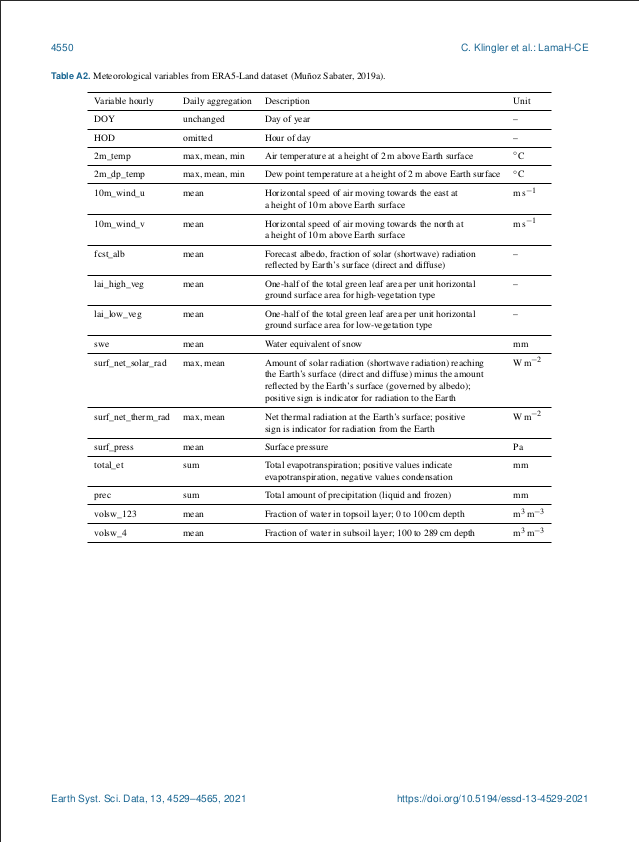




# Step 1 - Data Loading

Create random seed given by number 100

In [16]:
random.seed(100)
print(random.random())

0.1456692551041303


# TODO 
Change checking length of files via directory 
since it changes once a file is opened
Check all id numbers and list missing ones maybe

Check length of whole directory and of newly created random list

In [17]:
# Check how many files are stored in the directory
paths = "/home/funny/Documents/Uni/Climate_Change_AI/Project 2/Dataset/A_basins_total_upstrm/2_timeseries/daily"

# Get all the files in the directory
files = os.listdir(paths)

# Check length of files
print(len(files)) # 859

random_list = random.sample(files, 100)

# Check output of random_list
print(random_list)

# Check if the list is unique
print(len(random_list) == len(set(random_list)))

# Check if list has length 100
print(len(random_list) == 100)

859
['ID_577.csv', 'ID_770.csv', 'ID_45.csv', 'ID_156.csv', 'ID_545.csv', 'ID_77.csv', 'ID_240.csv', 'ID_283.csv', 'ID_784.csv', 'ID_47.csv', 'ID_150.csv', 'ID_576.csv', 'ID_377.csv', 'ID_629.csv', 'ID_200.csv', 'ID_801.csv', 'ID_134.csv', 'ID_823.csv', 'ID_203.csv', 'ID_446.csv', 'ID_60.csv', 'ID_795.csv', 'ID_278.csv', 'ID_680.csv', 'ID_673.csv', 'ID_769.csv', 'ID_831.csv', 'ID_64.csv', 'ID_669.csv', 'ID_33.csv', 'ID_127.csv', 'ID_711.csv', 'ID_181.csv', 'ID_63.csv', 'ID_124.csv', 'ID_259.csv', 'ID_656.csv', 'ID_785.csv', 'ID_119.csv', 'ID_593.csv', 'ID_59.csv', 'ID_657.csv', 'ID_17.csv', 'ID_248.csv', 'ID_141.csv', 'ID_744.csv', 'ID_344.csv', 'ID_11.csv', 'ID_703.csv', 'ID_477.csv', 'ID_199.csv', 'ID_758.csv', 'ID_255.csv', 'ID_793.csv', 'ID_118.csv', 'ID_543.csv', 'ID_19.csv', 'ID_659.csv', 'ID_645.csv', 'ID_760.csv', 'ID_867.csv', 'ID_313.csv', 'ID_549.csv', 'ID_174.csv', 'ID_105.csv', 'ID_714.csv', 'ID_658.csv', 'ID_1.csv', 'ID_568.csv', 'ID_474.csv', 'ID_496.csv', 'ID_842.csv', 

Load the data from the 100 random generated IDs

In [18]:
# Create a list of the paths to the files
paths = "~/Documents/Uni/Climate_Change_AI/Project 2/Dataset/A_basins_total_upstrm/2_timeseries/daily/"
df_list = []
for file_name in random_list:
    paths += file_name
    df = pd.read_csv(paths, sep=";")
    df_list.append(df)
    paths = "~/Documents/Uni/Climate_Change_AI/Project 2/Dataset/A_basins_total_upstrm/2_timeseries/daily/"

pd.set_option('display.max_colwidth', 2000)
df_list[0].head()


,YYYY,MM,DD,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,...,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4
0,1981,1,1,1,-3.2,-8.1,-12.8,-7.4,-11.4,-15.0,...,135.35,139,32,74,40,84110,0.13,1.73,0.31,0.37
1,1981,1,2,2,-5.8,-9.0,-11.9,-9.6,-12.4,-14.8,...,138.90,146,31,55,42,84140,0.12,3.77,0.31,0.37
2,1981,1,3,3,-2.9,-6.0,-10.0,-5.2,-7.9,-12.3,...,142.44,176,35,70,24,83358,-0.06,3.58,0.31,0.37
3,1981,1,4,4,-2.0,-5.5,-9.2,-4.8,-7.5,-11.3,...,145.10,134,27,67,38,82805,0.03,2.58,0.31,0.37
4,1981,1,5,5,-8.1,-10.4,-12.8,-12.0,-15.2,-17.5,...,148.94,134,28,76,50,83126,0.37,5.45,0.31,0.37


In [19]:
# Check that df_list has length 100
print(len(df_list) == 100)

# Check that all the dataframes have the same length as the first dataframe
for df in df_list:
    if (len(df) == len(df_list[0])):
       continue
    else:
        print("Dataframes do not have the same length")

print(f"Each dataframe has {len(df_list[0])} rows")

# Check that all the dataframes have the same columns as the first dataframe
for df in df_list:
    if (df.columns == df_list[0].columns).all():
        continue
    else:
        print("Dataframes do not have the same columns")

print(f"Each dataframe has {len(df_list[0].columns)} columns")

True
Each dataframe has 14244 rows
Each dataframe has 25 columns


# Step 2 - Null Value Analysis  

1. Check for obvious null values

In [20]:
# Check for null values
for df in df_list:
    if df.isnull().values.any():
        print("There are null values in the dataframe")
    else:
        continue

# Check for values of -999
for df in df_list:
    if (df == -999).values.any():
        print("There are values of -999 in the dataframe")
    else:
        continue

2. Check for more hidden null values such as missing rows i.e. a day where a measurement could not take place

In [21]:
# Check if a year is a leap year
def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or year % 400 == 0

# Check that each year has 365 or 366 days depending if it is a leap year or not
# Since we checked that all the dataframes have the same length as the first dataframe, we can just check the first dataframe
years_list = df_list[0]["YYYY"].unique()
for year in years_list:
    # Check if the year is a leap year
    if is_leap_year(year):
        # Check if the dataframe has 366 days
        if len(df_list[0][df_list[0]["YYYY"] == year]) == 366:
            continue
        else:
            print("Year {} does not have 366 days".format(year))
    else:
        # Check if the dataframe has 365 days
        if len(df_list[0][df_list[0]["YYYY"] == year]) == 365:
            continue
        else:
            print("Year {} does not have 365 days".format(year))

# Check if first dataframe has the number of years from 1981 to 2019
years_list = df_list[0]["YYYY"].unique()
for year in range(1981, 2020):
    if year in years_list:
        continue
    else:
        print("Year {} is not in the dataframe".format(year))

# Check if the dataframes have the same number of years as the first dataframe
for df in df_list:
    if len(df["YYYY"].unique()) == len(df_list[0]["YYYY"].unique()):
        continue
    else:
        print("Dataframes do not have the same number of years")



### Reflection

Not a single null value or any value of -999 could be obtained. There is also not a single line missing in one dataframe, meaning on each random location were measurements taken every single day from 1981 to 2019.

Another insight is that column 'swe' has a lot of 0's, which makes sense since swe stands for 'Water equivalent of snow' and perfectly fitting to the summer month where usually no snow is occurring each column contains a lot of 0.

# Step 3 - Statistical Analysis

## 1. Summary statistics  
Calculates descriptive statistics for numerical columns like mean, median, standard deviation, min, max, etc.
Plot boxplots for each theme and check for outliers

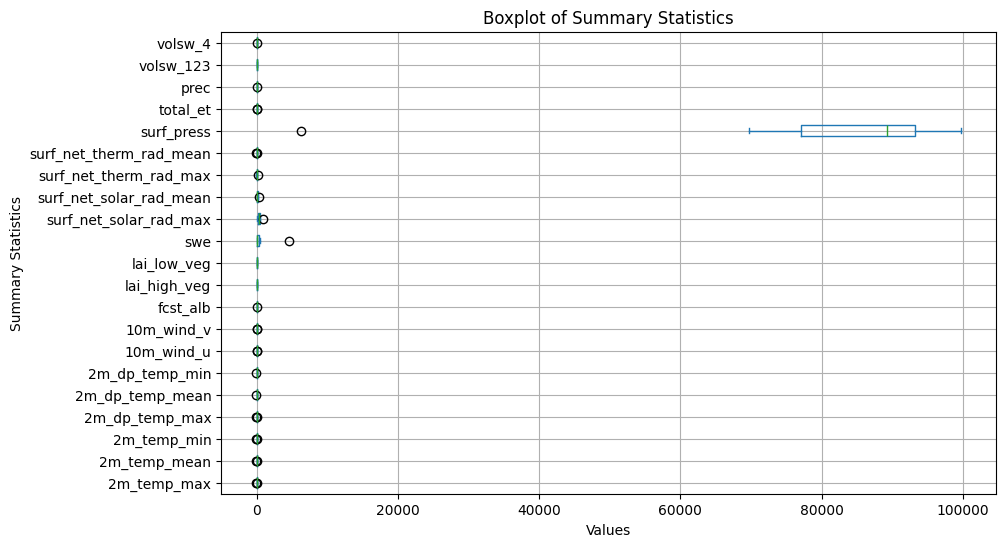

In [22]:
# Concat all df into one df
df = pd.concat(df_list)

# Describe the data to get summary statistics without the first four columns
numerical_columns = df.columns[4:]

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Remove the count row
summary_stats = summary_stats.drop('count', axis=0)

ax = summary_stats.plot(kind='box', vert=False, figsize=(10, 6))
#ax.set_xscale('log')
plt.title('Boxplot of Summary Statistics')
plt.xlabel('Values')
plt.ylabel('Summary Statistics')
plt.grid(True)
plt.show()

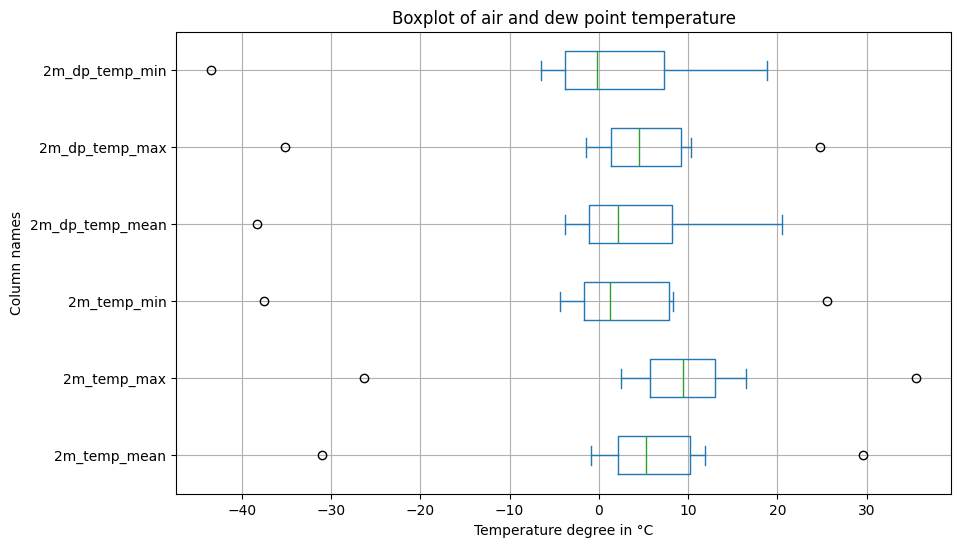

In [23]:
# Describe the data to get summary statistics without the first four columns
numerical_columns = ["2m_temp_mean", "2m_temp_max", "2m_temp_min", "2m_dp_temp_mean", "2m_dp_temp_max", "2m_dp_temp_min"]

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Remove the count row
summary_stats = summary_stats.drop('count', axis=0)

ax = summary_stats.plot(kind='box', vert=False, figsize=(10, 6))
#ax.set_xscale('log')
plt.title('Boxplot of air and dew point temperature')
plt.xlabel('Temperature degree in °C')
plt.ylabel('Column names')
plt.grid(True)
plt.show()

Conclusion: Reasonable outliers. There is no further step needed since all of the outliers stay within reasonable and natural temperature degrees. There is even a [Wikipedia article](https://en.wikipedia.org/wiki/Early_2012_European_cold_wave) about a cold winter in Europe of -40° degrees.


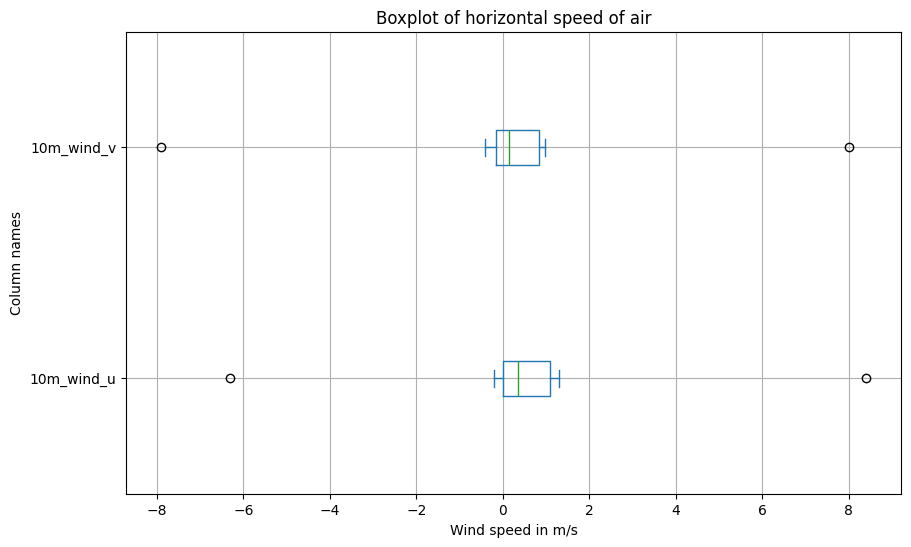

In [24]:
# Describe the data to get summary statistics without the first four columns
numerical_columns = ['10m_wind_u', '10m_wind_v']

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Remove the count row
summary_stats = summary_stats.drop('count', axis=0)

ax = summary_stats.plot(kind='box', vert=False, figsize=(10, 6))
#ax.set_xscale('log')
plt.title('Boxplot of horizontal speed of air')
plt.xlabel('Wind speed in m/s')
plt.ylabel('Column names')
plt.grid(True)
plt.show()

Conclusion: This boxplot is not quite intuitively since we see negative numbers in the unit m/s. In a second thought this makes sense, since has to be the opposite wind direction. For example in the description it says '10m_wind_u' is the speed of air towards the east. Thus, a negative value is the speed of air towards the west. \
In the end, no unnatural outliers could be detected as this [table](https://de.wikipedia.org/wiki/Windgeschwindigkeit#Windst%C3%A4rken_und_Beaufort-Skala) gives us an insight of mean wind speeds.

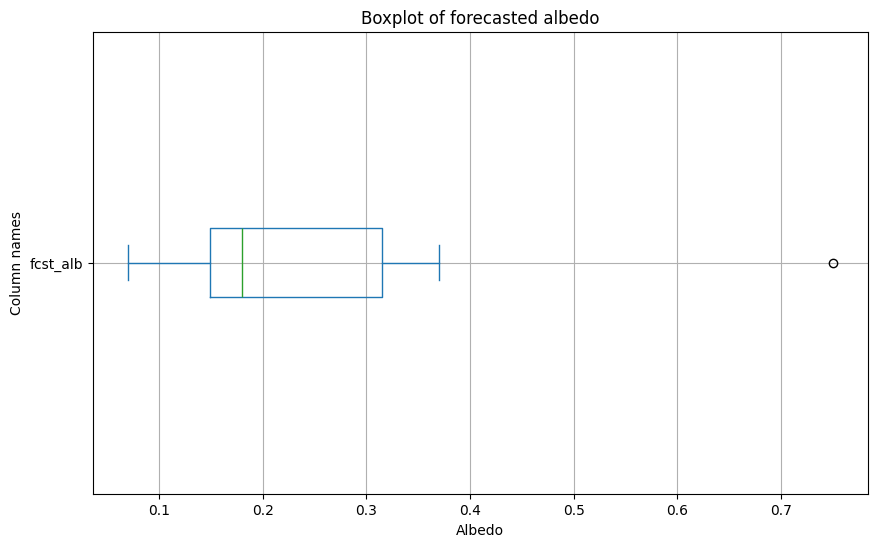

In [25]:
# Describe the data to get summary statistics without the first four columns
numerical_columns = ['fcst_alb']

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Remove the count row
summary_stats = summary_stats.drop('count', axis=0)

ax = summary_stats.plot(kind='box', vert=False, figsize=(10, 6))
#ax.set_xscale('log')
plt.title('Boxplot of forecasted albedo')
plt.xlabel('Albedo')
plt.ylabel('Column names')
plt.grid(True)
plt.show()

Conclusion: Given from this [website](https://codes.ecmwf.int/grib/param-db/?id=243) the unit is between 0 and 1, which is shown well in this boxplot. No unreasonable outlier.

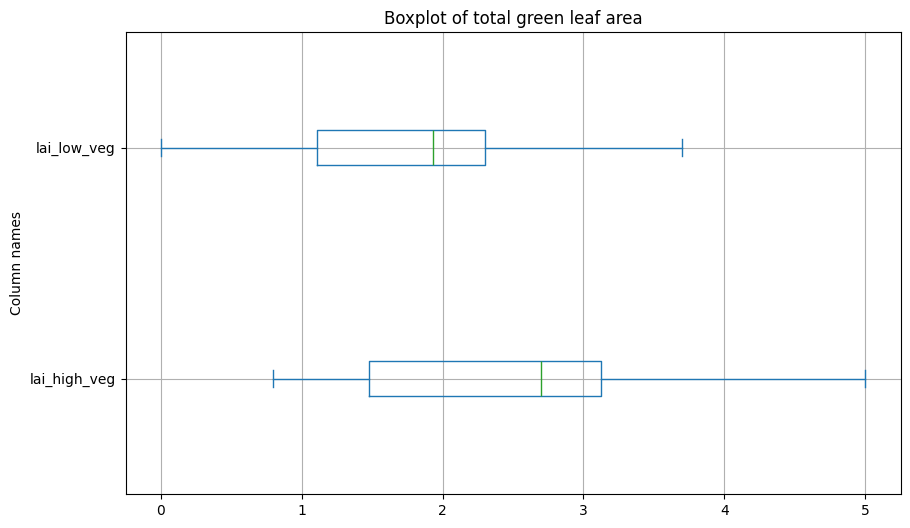

In [26]:
# Describe the data to get summary statistics without the first four columns
numerical_columns = ['lai_high_veg', 'lai_low_veg']

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Remove the count row
summary_stats = summary_stats.drop('count', axis=0)

ax = summary_stats.plot(kind='box', vert=False, figsize=(10, 6))
#ax.set_xscale('log')
plt.title('Boxplot of total green leaf area')
plt.xlabel('')
plt.ylabel('Column names')
plt.grid(True)
plt.show()

Conclusion: No outliers given in the boxplot.\
For further understanding, the definition of the Leaf Area Index (LAI) is:\
'Leaf Area Index of a plant canopy or ecosystem, is defined as one half of the total green leaf area per unit horizontal ground surface area. It measures the area of leaf material present in the specified environment. This dimensionless variable (sometimes expressed in terms of square metres of leaf material per square metre of ground) varies between 0 and values of about 10 or so, depending on local conditions.' [Source](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-lai-fapar?tab=overview)

From this definition, we are safe that the data is correct since it is in bound of the range 0 to 10.

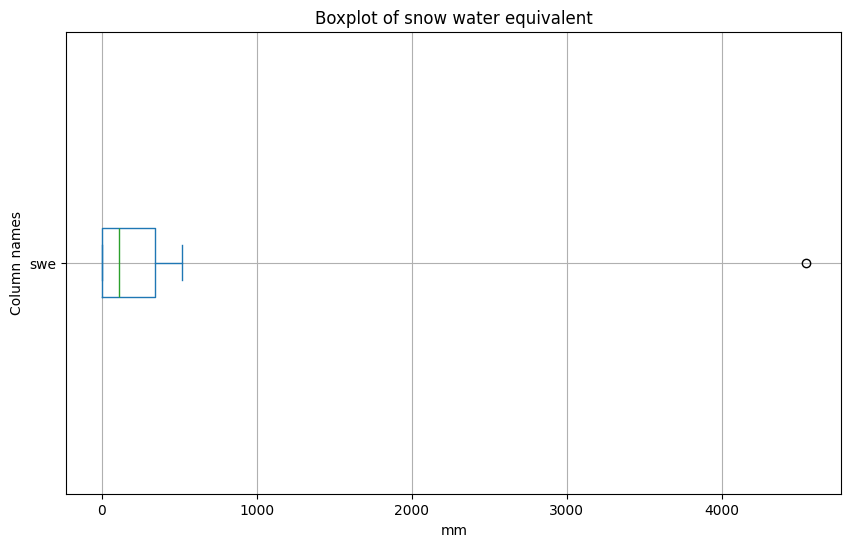

In [27]:
# Describe the data to get summary statistics without the first four columns
numerical_columns = ['swe']

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Remove the count row
summary_stats = summary_stats.drop('count', axis=0)

ax = summary_stats.plot(kind='box', vert=False, figsize=(10, 6))
#ax.set_xscale('log')
plt.title('Boxplot of snow water equivalent')
plt.xlabel('mm')
plt.ylabel('Column names')
plt.grid(True)
plt.show()

### Conclusion
This outlier creates a relatively big gap towards the other values. This is a little bit suspicious and a reason to dive deeper into the topic of the snow water equivalent.
From the official source [Copernicus Global Land Service](https://land.copernicus.eu/global/) the snow water equivalent is described as: '[...] the equivalent amount of liquid water stored in the snow pack. It indicates the water column that would theoretically result should the whole snow pack melt instantaneously and is defined as product between the snow layer’s depth and density.' [Source](https://land.copernicus.eu/global/products/swe)

In the technical section it also states the physical unit as millimeters (mm) and also provides a physical min value of 0 and physical max value of 500. On the data file content is noted that, ' the physical values (PV) are derived from the digital number (DN) without scaling and offset.' [Source](https://land.copernicus.eu/global/products/swe)

Therefore, we can ignore all the values being less than a thousand millimeter due to smaller offset measurements. Every value greater than thousand millimeter needs to be removed.

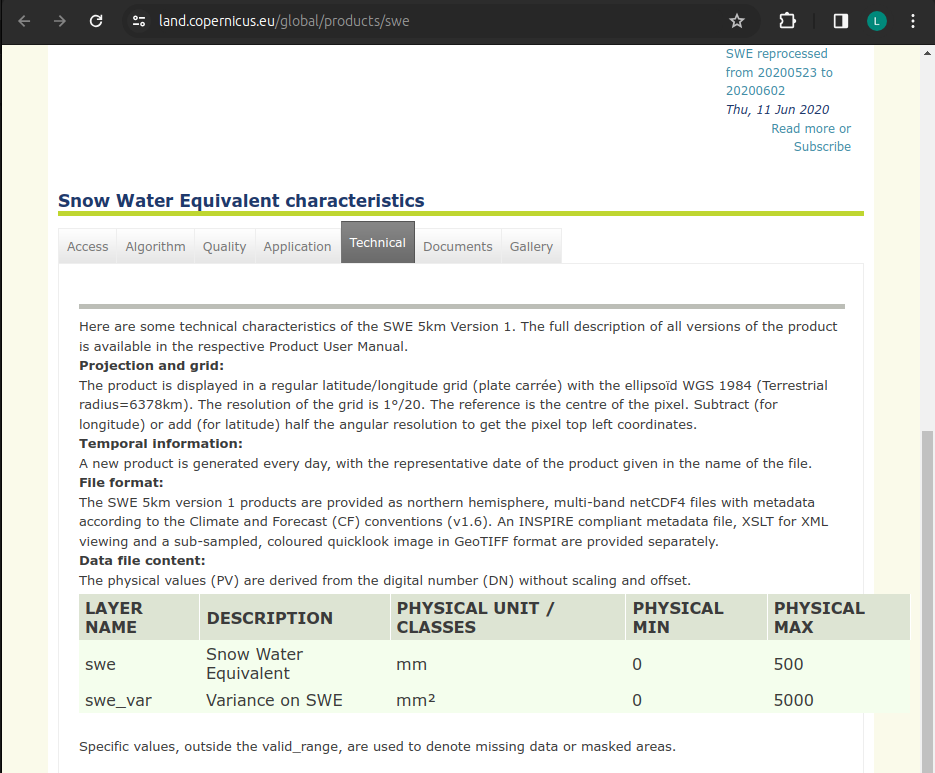

# TODO
Continue here, removin the outlier > 1000 and check how many outliers are > 500. If < 10, remove those as well.

Then, continue on with the next paramter surf_net...

## 2. Correlation matrix

<Axes: >

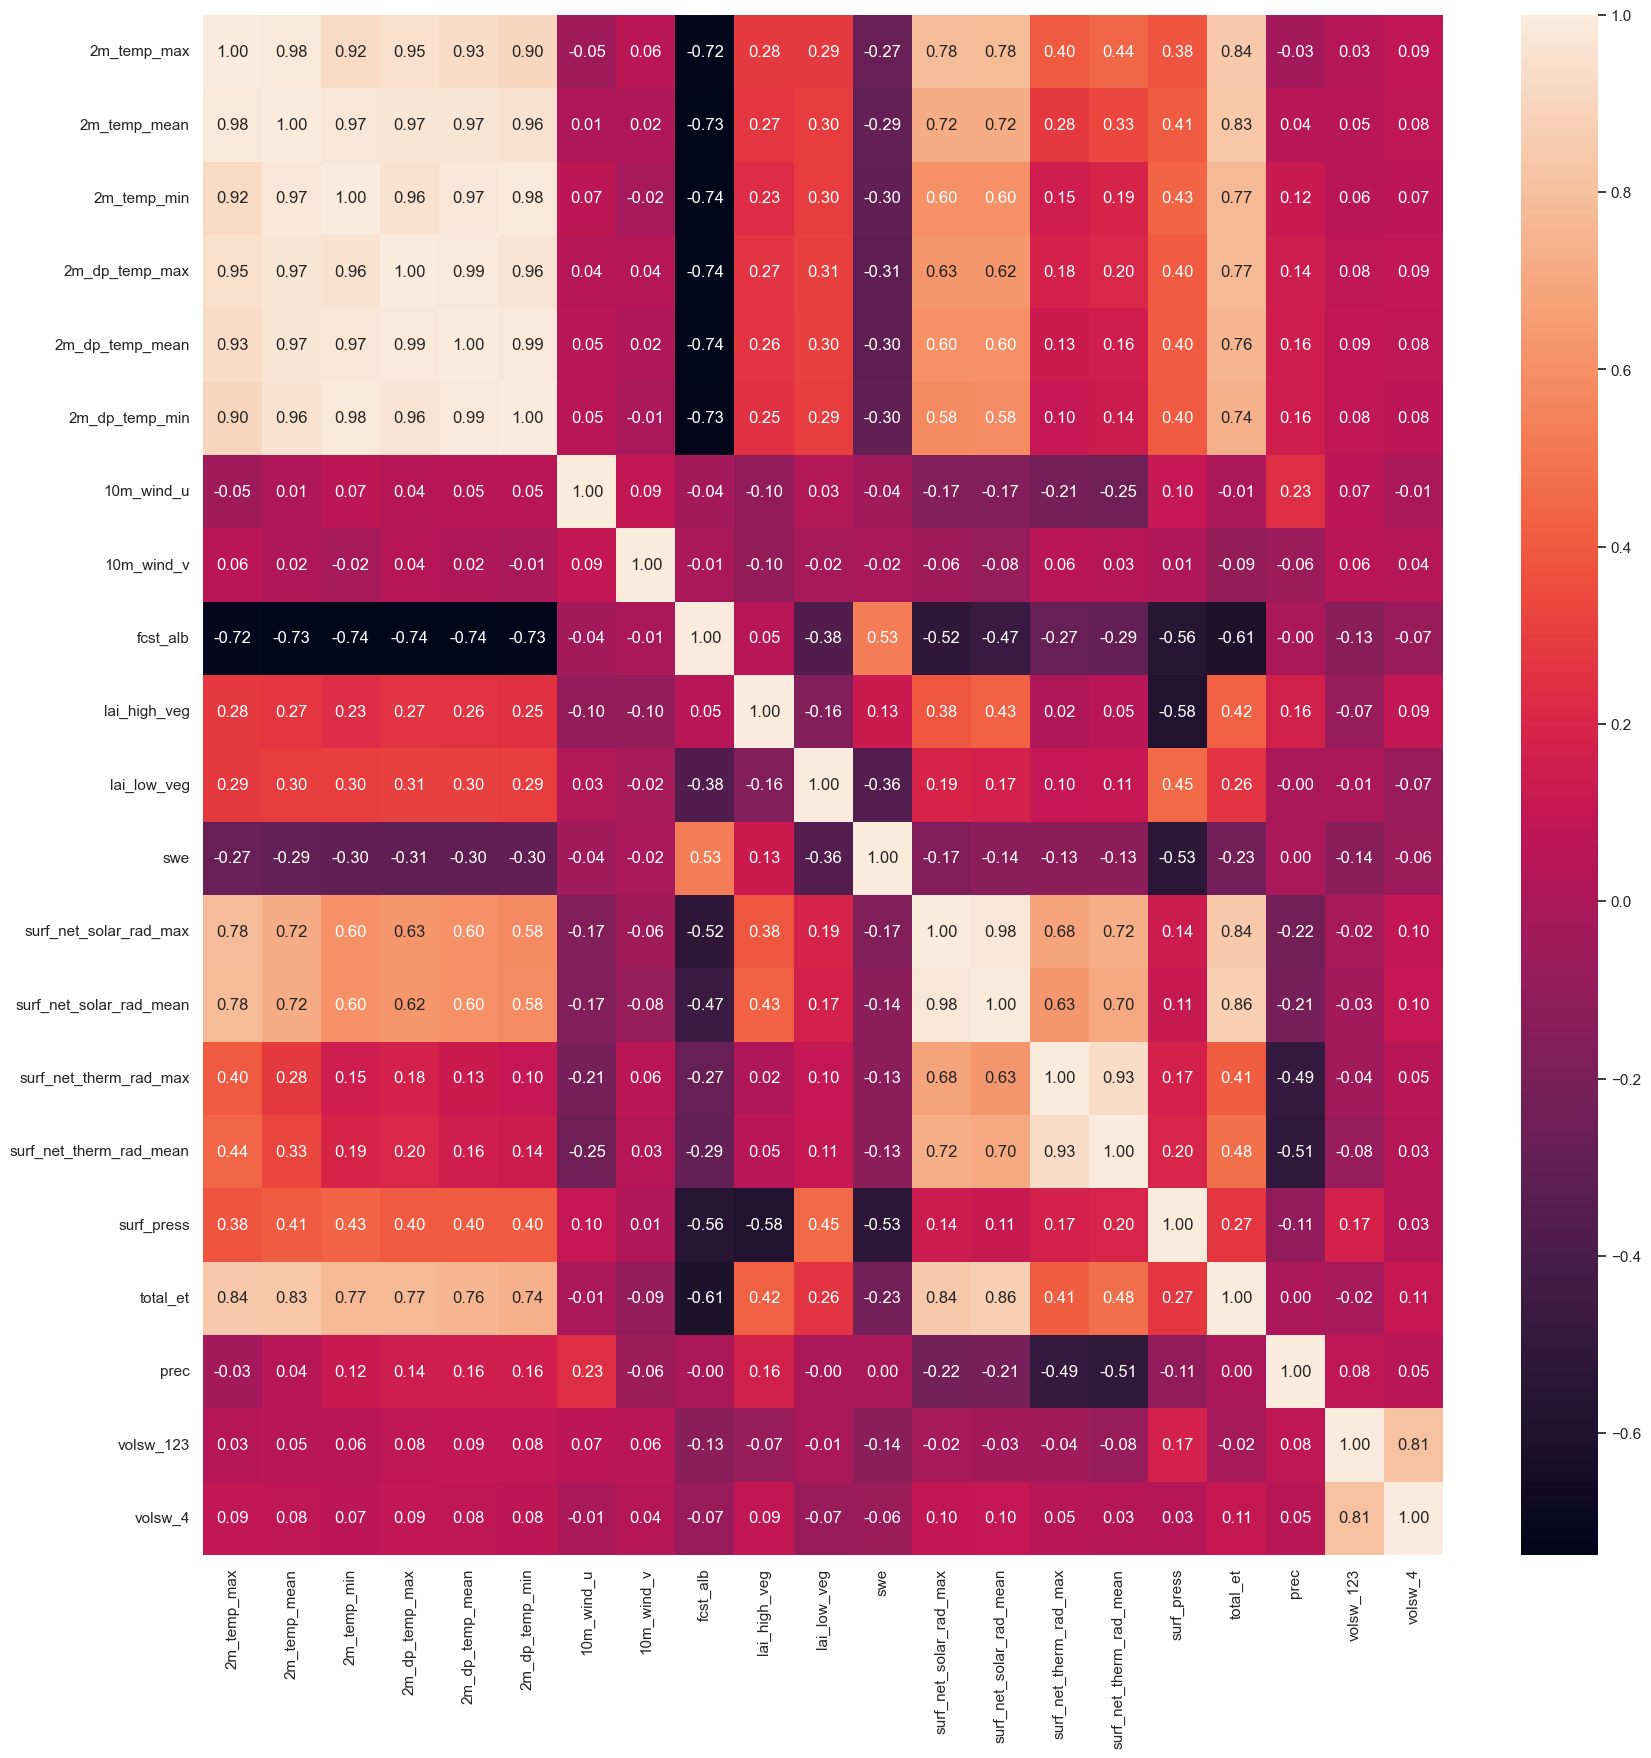

In [28]:
# Get all columns except the first four
numerical_columns = df.columns[4:]

# Calculate correlation matrix via seaborn
sns.set_theme()
plt.figure(figsize=(20, 20))

# Plot the correlation matrix
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt=".2f")

## 3. Histogram

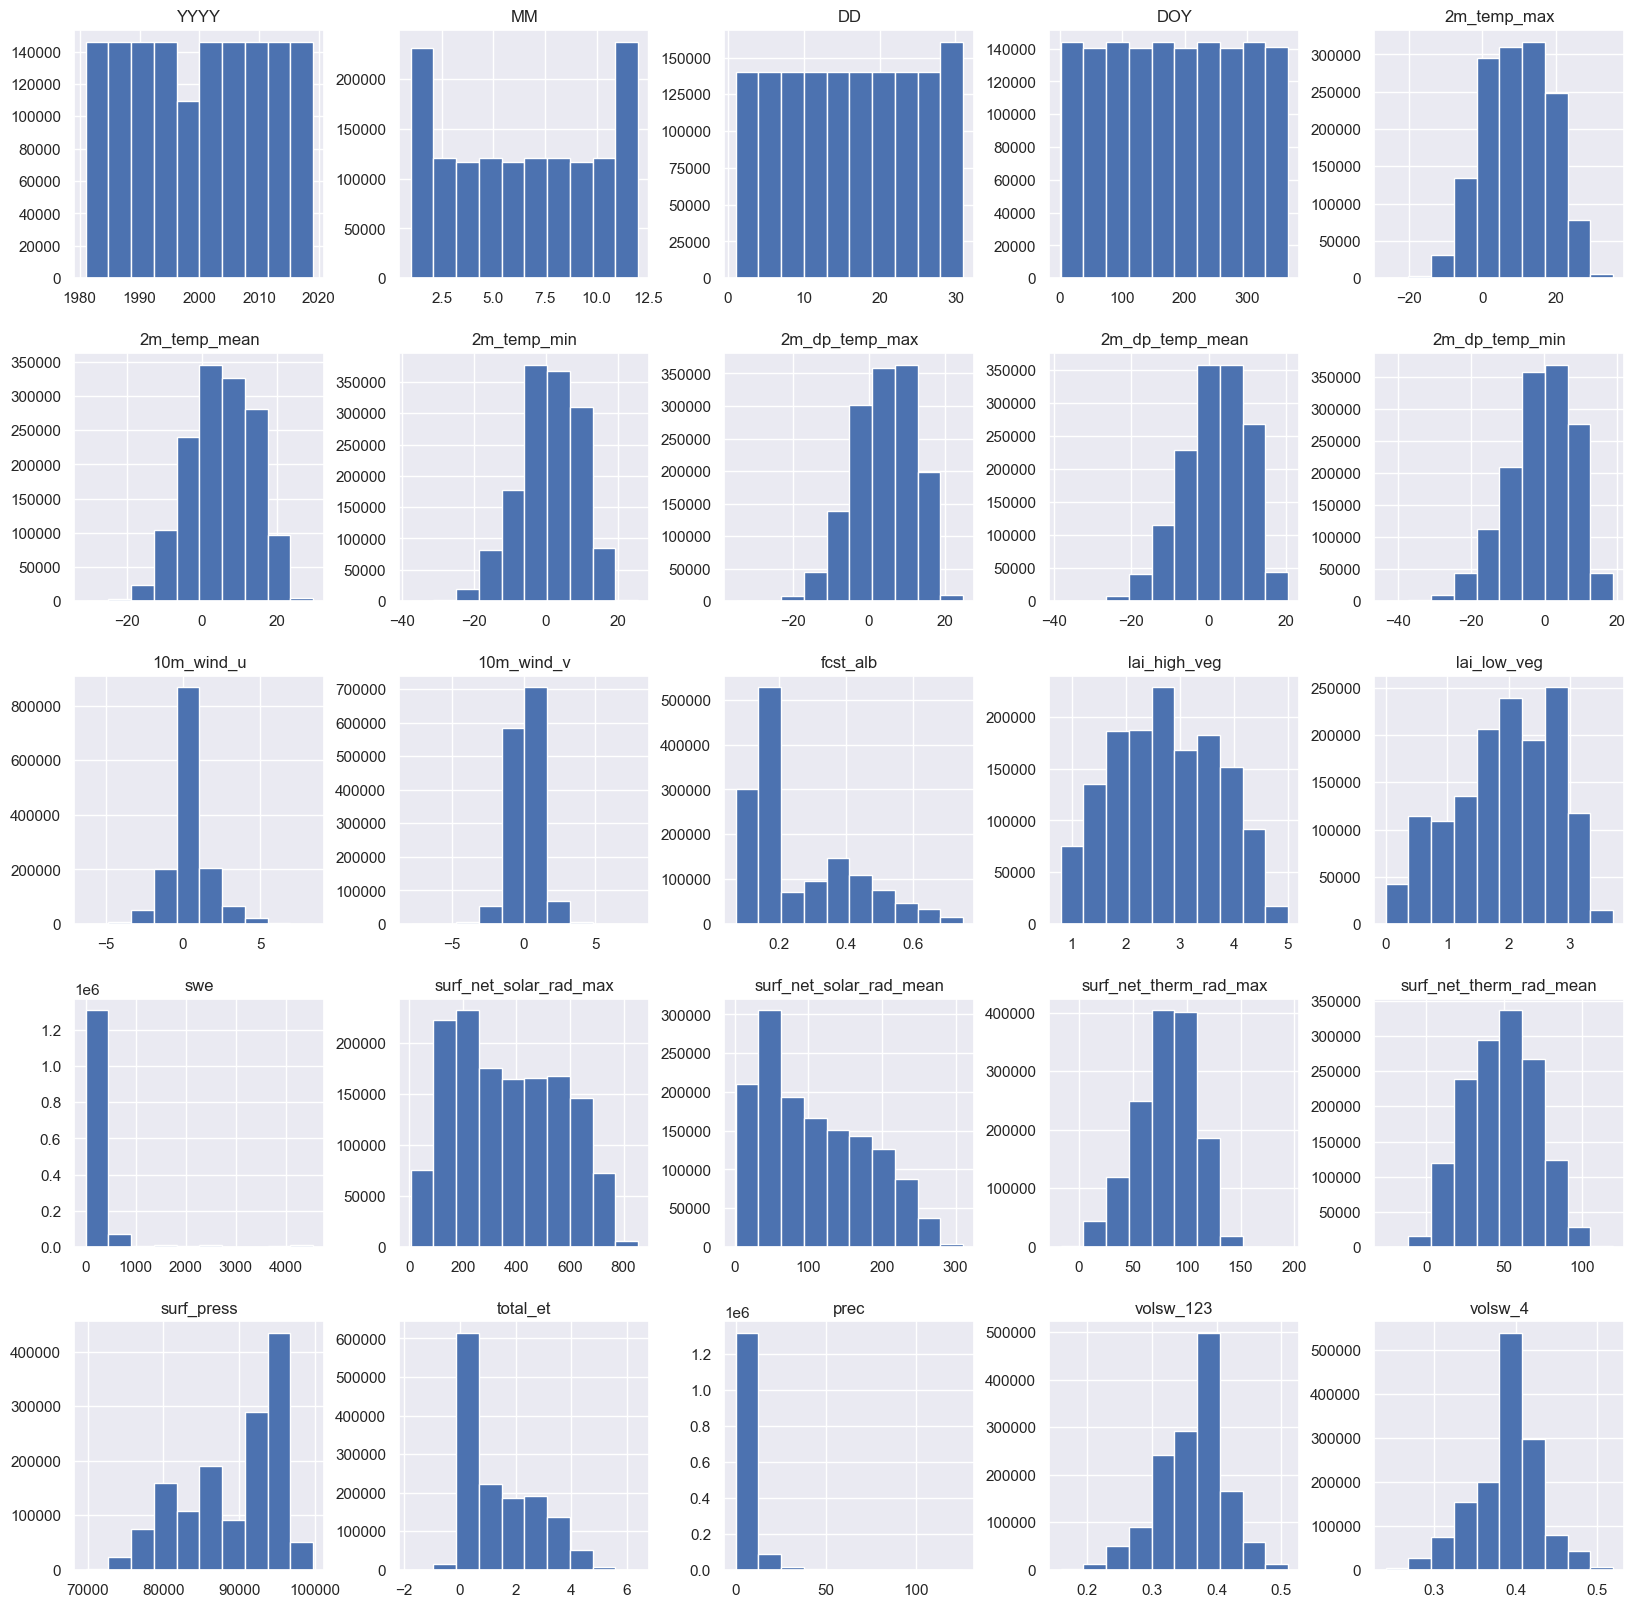

In [29]:
# Plot histogram of the data
df.hist(figsize=(20, 20))
plt.show()

Sample plot of precipitation from year 1981 to 2019

<Axes: xlabel='YYYY,MM'>

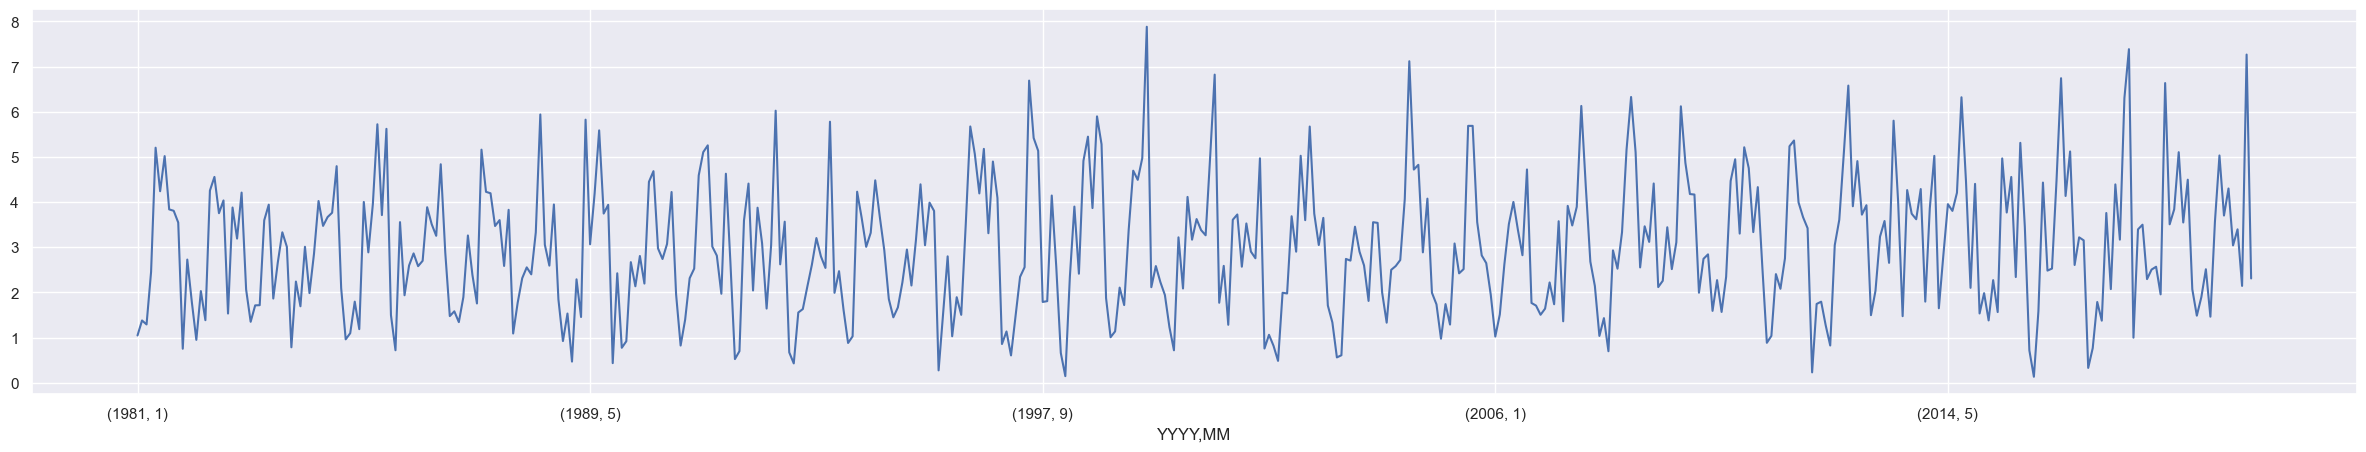

In [30]:
sample_one = df_list[0].groupby(["YYYY", "MM"]).mean()
plt.figure(figsize = (30, 5))
sample_one["prec"].plot()
#sample_one["2m_temp_mean"].plot()

# Step 4 - Data Preprocessing
Impute missing values and transform/normalize any data, if needed

### Process
Since we could not find any missing values or null values, imputation is not necessary.
Therefore, we can describe the next steps as follows:

1. First, we add the columns longitude, latitude and elevation from the table gauges_attributes.csv in folder 'D_gauges/1_attributes'


2. To predict the next days precipitation (prec), each dataframe needs to be processed by removing the first value of the prec-column, move each prec-value up by one row and finally remove the last line. This makes sense, since we have no given data for the first prec-value and no given prec-value for the last row of data.
3. Next, we split the dataset into a training dataset 70% and a test dataset 30%
4. Found some outliers but none of them were unrealistic or unnatural behaviors i.e. just extreme weather conditions
5. We found the column surf_press with very high values comparing to the other columns (mean of appr. 90000 vs mean of 0) and the column swe (mean of appr. 500 vs mean of 0). Therefore, we normalize the whole dataset. 
6. Export each dataframe to csv files

### 1. step
Add columns longitude, latitude and elevation to main dataframe

In [31]:
paths_to_gauges = "~/Documents/Uni/Climate_Change_AI/Project 2/Dataset/D_gauges/1_attributes/Gauge_attributes.csv"
element_ids = [int(item.lstrip("ID_").rstrip(".csv")) for item in random_list]

# Add 0 to element_ids to get the header of the csv file
element_ids.append(0)

# Read the csv file
df_gauges = pd.read_csv(paths_to_gauges, sep=";", header=0, usecols=[0,5,6,7], skiprows=lambda x: x not in element_ids)

# Remove 0 from element_ids
element_ids.remove(0)

# Check for null values
if df_gauges.isnull().values.any():
    print("There are null values in the dataframe")

# Check for values of -999
if (df_gauges == -999).values.any():
    print("There are values of -999 in the dataframe")

df_gauges.head()

# Iterate over the element_ids and get the corresponding gauge attributes
for i in range(len(element_ids)):

    # Get the positional arguments
    positional_arguments = df_gauges.iloc[:, 1:][df_gauges["ID"] == element_ids[i]]

    df_item = df_list[i]
    df_item["elev"] = positional_arguments.iat[0, 0]
    df_item["lon"] = positional_arguments.iat[0, 1]
    df_item["lat"] = positional_arguments.iat[0, 2]
    df_list[i] = df_item

# Check if the positional arguments have been added to the dataframes
df_list[9].head()

,YYYY,MM,DD,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,...,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4,elev,lon,lat
0,1981,1,1,1,-10.1,-13.2,-17.1,-14.2,-17.9,-21.8,...,22,3,73588,-0.04,4.19,0.29,0.36,1895,4377121,2643013
1,1981,1,2,2,-12.7,-15.4,-17.4,-14.5,-17.6,-19.4,...,41,7,73472,0.00,9.79,0.29,0.36,1895,4377121,2643013
2,1981,1,3,3,-6.5,-9.0,-12.2,-7.6,-10.9,-13.9,...,22,-4,72986,0.00,13.19,0.29,0.36,1895,4377121,2643013
3,1981,1,4,4,-6.4,-10.1,-15.4,-7.3,-11.6,-18.8,...,60,9,72248,0.01,19.34,0.29,0.36,1895,4377121,2643013
4,1981,1,5,5,-15.2,-17.9,-19.0,-18.8,-20.7,-21.9,...,43,10,72468,0.13,12.95,0.29,0.36,1895,4377121,2643013


### 2. Step
Transform dataframes for modeling

In [32]:
print(len(df_list[0]))

# Deep copy the list
df_manipulated_list = [df.copy(deep=True) for df in df_list]

# Iterate over the dataframes
for index, df in enumerate(df_manipulated_list):
    # Remove the first value of the prec-column and move each prec-value one row up
    df["prec"] = df["prec"].shift(-1, axis=0)

    # Remove the last line
    df = df[:-1]

    # Save dataframe in the list
    df_manipulated_list[index] = df




14244


Check if prec-values are moved correctly

In [33]:
# Check for row lengths. Each dataframe should have one row less than the original dataframe
for index, df in enumerate(df_manipulated_list):
    if len(df) + 1  == len(df_list[index]):
        continue
    else:
        print("Dataframes do not have the same length")


# Check for correct row alignment. The first row of the manipulated dataframe should be the second row of the original dataframe
for index, df in enumerate(df_manipulated_list):
    if df["prec"].iloc[0] == (df_list[index]["prec"].iloc[1]):
        continue
    else:
        print("Dataframes are not aligned correctly")

### 3. Step 
Split the dataset into a training dataset 70% and a test dataset 30%. 

**Important** \
Here it is okay to randomly choose 70% of the df_manipulated_list since each dataframe represents one random location.


In [34]:
# Select 70% of the data for training
train, test = train_test_split(df_manipulated_list, train_size=0.7, random_state=100)

# Check if the length of train and test is correct
print(len(train) == 70)
print(len(test) == 30)
train[0].head()

# Concat all df into one df
df_train = pd.concat(train)
df_test = pd.concat(test)

True
True


### 4. Step
Normalize the data

In [35]:
# Normalize the data

df_train_scaled = df_train.copy()

scaler = StandardScaler()

numerical_cols = ['2m_temp_max', '2m_temp_mean', '2m_temp_min', '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min',
                  '10m_wind_u', '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe', 'surf_net_solar_rad_max',
                  'surf_net_solar_rad_mean', 'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press', 'total_et',
                  'prec', 'volsw_123', 'volsw_4', 'elev', 'lon', 'lat']

df_train_scaled[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

df_train_scaled.head()

# Scale the test data
df_test_scaled = df_test.copy()

df_test_scaled[numerical_cols] = scaler.fit_transform(df_test[numerical_cols])


### 6. step
Export dataframes to csv files

In [36]:
# Export the dataframes to csv files
df_train_scaled.to_csv("scaled_train.csv", sep=";", index=False)
df_train.to_csv("train.csv", sep=";", index=False)
df_test_scaled.to_csv("scaled_test.csv", sep=";", index=False)
df_test.to_csv("test.csv", sep=";", index=False)

# Step 5 - Discussing Data Quality & Engineering